In [1270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

In [1271]:
df = pd.read_csv('EDUCABIZ.csv')
df

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49.0,0.0,31.0,14.0,0.0,78.0,0.0,0.0,0.0
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0.0,0.0,94.0,108.0,0.0,0.0,0.0,0.0,0.0
2,Jan,ABLA,https://abla.educabiz.com,411.0,104.0,152.0,1988.0,3.0,490.0,0.0,5.0,0.0
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87.0,0.0,0.0,217.0,18.0,193.0,0.0,0.0,0.0
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0.0,0.0,144.0,93.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77.0,46.0,38.0,353.0,NaN,340.0,2278.0,NaN,NaN
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141.0,25.0,63.0,411.0,NaN,60.0,358.0,NaN,NaN
4642,Ago,Zebra,https://zebra.educabiz.com,1.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN
4643,Ago,Simplio,https://simplio.educabiz.com,NaN,NaN,54.0,196.0,NaN,NaN,NaN,NaN,NaN


# Quick Data Cleaning

In [1272]:
df.describe()

,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
count,4473.000000,4377.000000,4196.000000,4473.000000,3849.000000,4234.000000,3480.000000,3093.000000,3099.000000
mean,96.223564,14.053233,69.923975,506.964230,4.073006,195.168399,1121.737069,0.468154,1.590190
std,92.322106,20.208209,129.981332,685.107988,11.202011,218.902311,1481.479556,1.643533,14.727321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76.000000,7.000000,18.000000,258.000000,0.000000,153.000000,726.000000,0.000000,0.000000
75%,131.000000,19.000000,90.000000,686.000000,3.000000,283.750000,1789.250000,0.000000,0.000000
max,764.000000,216.000000,1854.000000,8357.000000,259.000000,2718.000000,14502.000000,33.000000,442.000000


In [1273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   month                        4645 non-null   object 
 1   escola                       4645 non-null   object 
 2   slug                         4645 non-null   object 
 3   tutores                      4473 non-null   float64
 4   second_tutor                 4377 non-null   float64
 5   docs_fiscais (15_dias)       4196 non-null   float64
 6   mensagens (7_dias)           4473 non-null   float64
 7   atividades (7_dias)          3849 non-null   float64
 8   relatorios_diarios (7_dias)  4234 non-null   float64
 9   avaliacoes (7_dias)          3480 non-null   float64
 10  menus (7_dias)               3093 non-null   float64
 11  eventos (15_dias)            3099 non-null   float64
dtypes: float64(9), object(3)
memory usage: 435.6+ KB


In [1274]:
# Missing values
df.isnull().sum() / df.shape[0] * 100

month                           0.000000
escola                          0.000000
slug                            0.000000
tutores                         3.702906
second_tutor                    5.769645
docs_fiscais (15_dias)          9.666308
mensagens (7_dias)              3.702906
atividades (7_dias)            17.136706
relatorios_diarios (7_dias)     8.848224
avaliacoes (7_dias)            25.080732
menus (7_dias)                 33.412271
eventos (15_dias)              33.283100
dtype: float64

In [1275]:
df['month'].isna().sum()

0

In [1276]:
# Let´s take a look to some missing values
df[df['tutores'].isna()]

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias)
3826,Ago,Creche Olhos de Água,https://scmaolhosdeagua.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3827,Ago,Infantário do LNEC,https://lnec.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3828,Ago,CEJI Gondomar,https://cejigondomar.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3831,Ago,Tribo Verde,https://triboverde.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3832,Ago,Creche de S. Roque,https://crechesroque.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4624,Ago,Funny Center,https://funnycenter.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4628,Ago,sabiUs,https://sabius.educabiz.com,NaN,NaN,74.0,788.0,NaN,NaN,NaN,NaN,NaN
4632,Ago,Pio XII,https://pioxii.educabiz.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4639,Ago,DNA – Dance N’ Arts School,https://dna.educabiz.com,NaN,NaN,15.0,25.0,NaN,NaN,NaN,NaN,NaN


In [1277]:
# Missing Values is equal to 0 so let´s replace all the missing values by 0
df.fillna(0,inplace=True)
df.isnull().sum()

month                          0
escola                         0
slug                           0
tutores                        0
second_tutor                   0
docs_fiscais (15_dias)         0
mensagens (7_dias)             0
atividades (7_dias)            0
relatorios_diarios (7_dias)    0
avaliacoes (7_dias)            0
menus (7_dias)                 0
eventos (15_dias)              0
dtype: int64

In [1278]:
# Let´s change the data type where the columns are 'float64' to 'int32'
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('int32') 

In [1279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   month                        4645 non-null   object
 1   escola                       4645 non-null   object
 2   slug                         4645 non-null   object
 3   tutores                      4645 non-null   int32 
 4   second_tutor                 4645 non-null   int32 
 5   docs_fiscais (15_dias)       4645 non-null   int32 
 6   mensagens (7_dias)           4645 non-null   int32 
 7   atividades (7_dias)          4645 non-null   int32 
 8   relatorios_diarios (7_dias)  4645 non-null   int32 
 9   avaliacoes (7_dias)          4645 non-null   int32 
 10  menus (7_dias)               4645 non-null   int32 
 11  eventos (15_dias)            4645 non-null   int32 
dtypes: int32(9), object(3)
memory usage: 272.3+ KB


In [1280]:
df['month'].value_counts()

month
Ago     819
Jul     788
Jan     782
Mai     755
Abri    754
Mar     747
Name: count, dtype: int64

In [1281]:
df['escola'].value_counts()

escola
Morango Mágico                            12
Educa - Centro de Estudos                 12
Escola Inglesa                            12
Get it Instituto e Explicações Línguas    12
Creche BebéCresce                         12
                                          ..
Brainclick                                 1
Brighton Learning Centre                   1
CAIDI                                      1
Cantinho do Jubas                          1
Rota do Saber                              1
Name: count, Length: 888, dtype: int64

# Numeric Data
* Let´s Take a look to the data distribution and relashionship between our data

In [1282]:
# Let´s create a column called 'total_interacoes'. I t will be the sum of every numeric column, just to be our 'y'
df['interacoes_totais'] = df.iloc[:,3:12].sum(axis=1)
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


__Data Distribution__

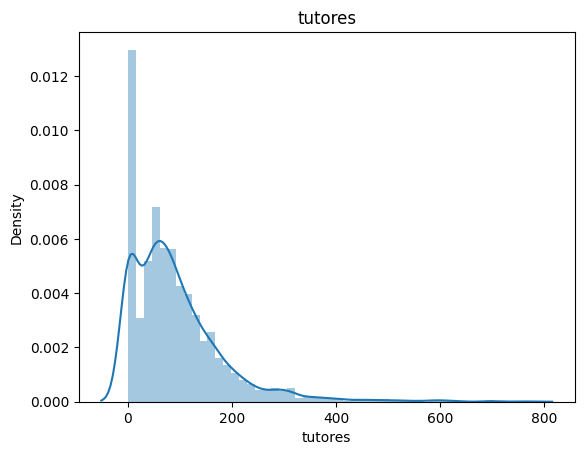

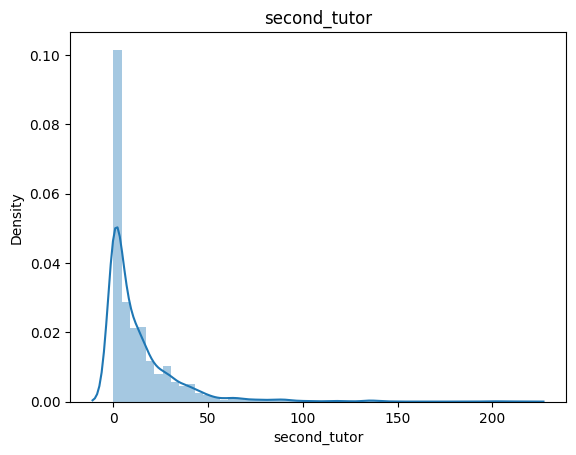

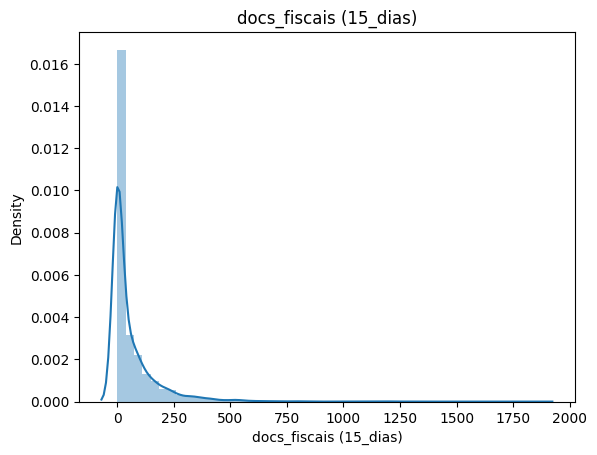

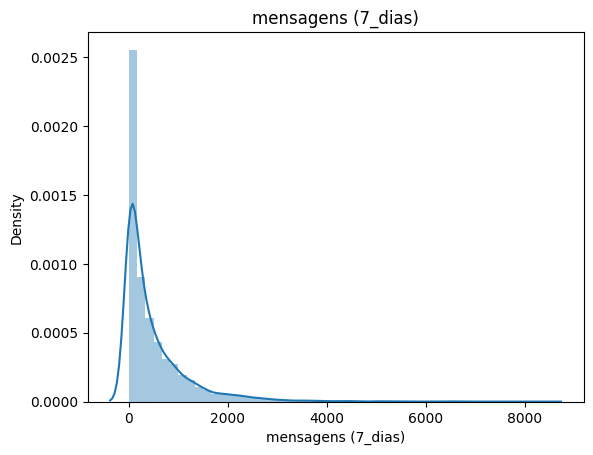

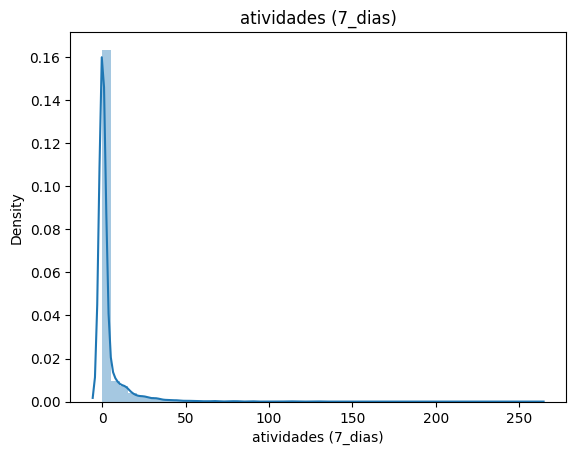

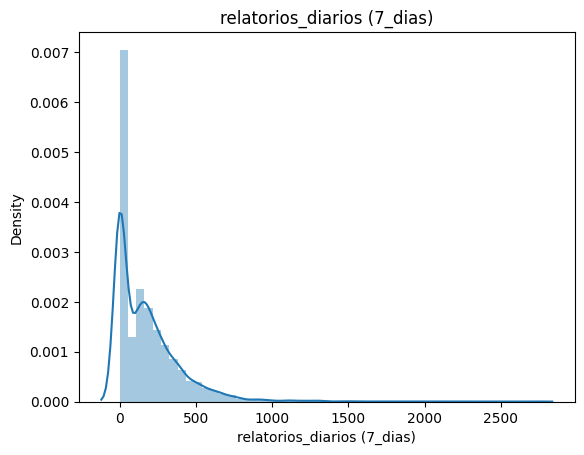

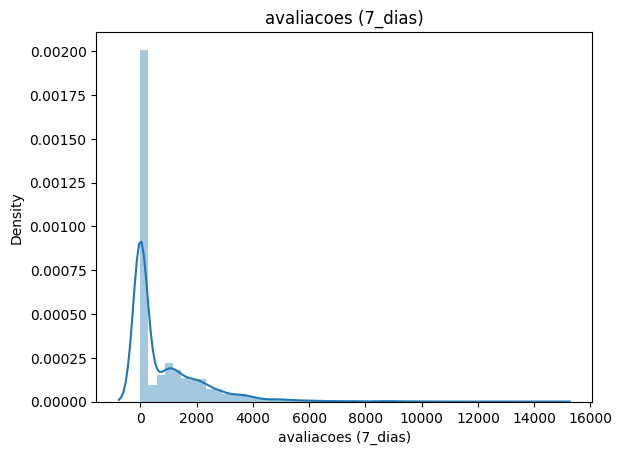

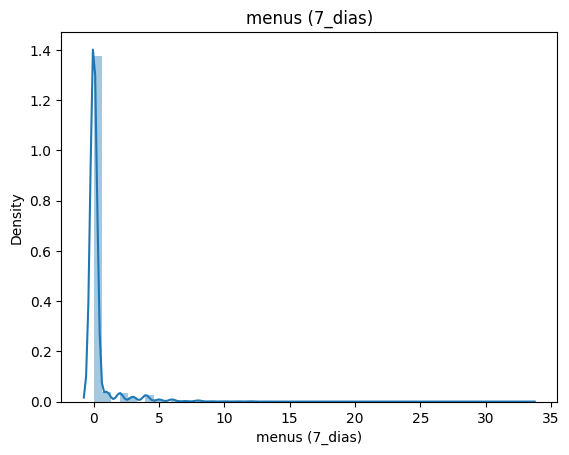

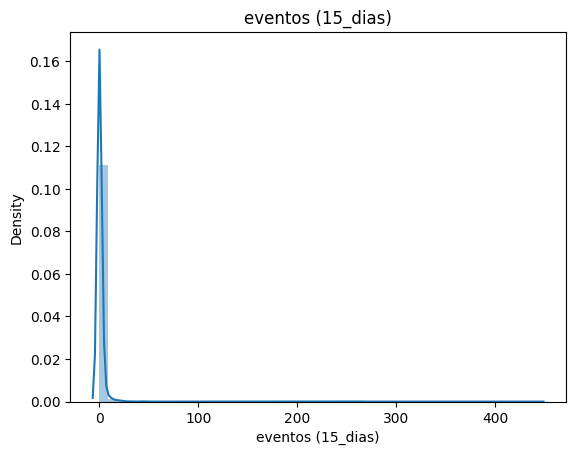

In [1283]:
# Distplot for data with type = 'int32'
for col in df.columns:
    if df[col].dtype == 'int32':
        sns.distplot(df[col])
        plt.title(col)
        plt.show()

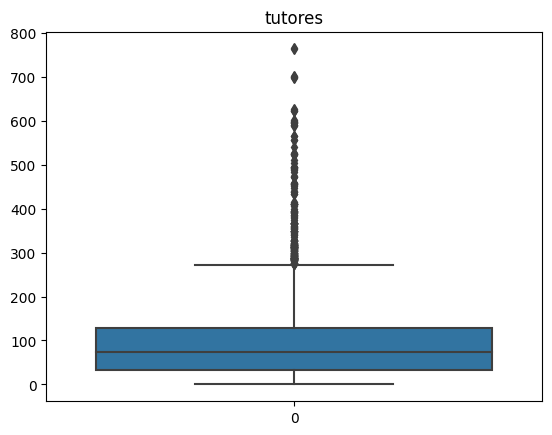

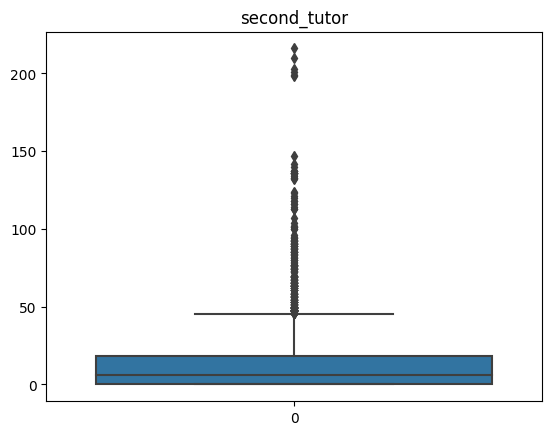

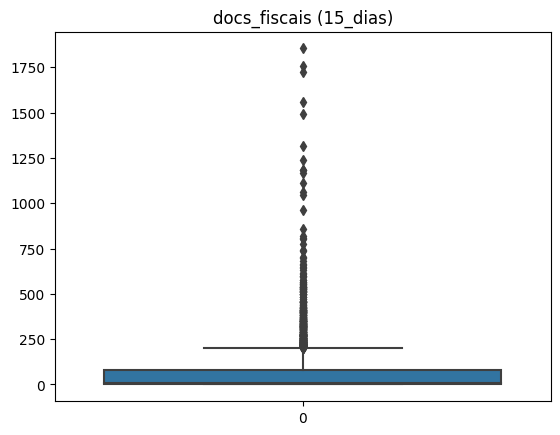

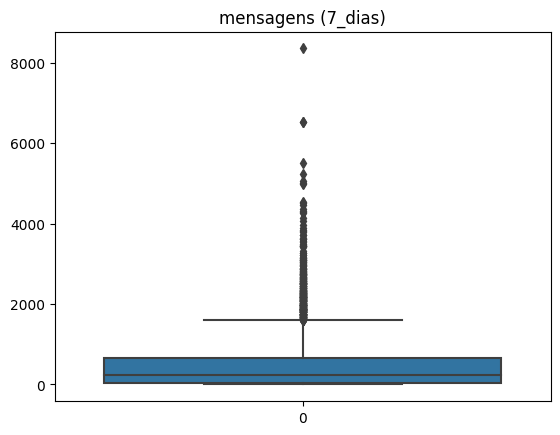

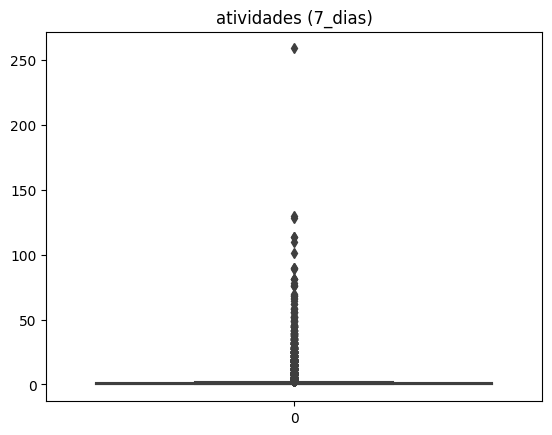

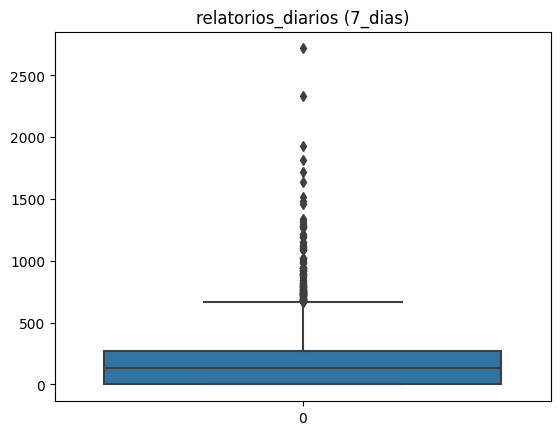

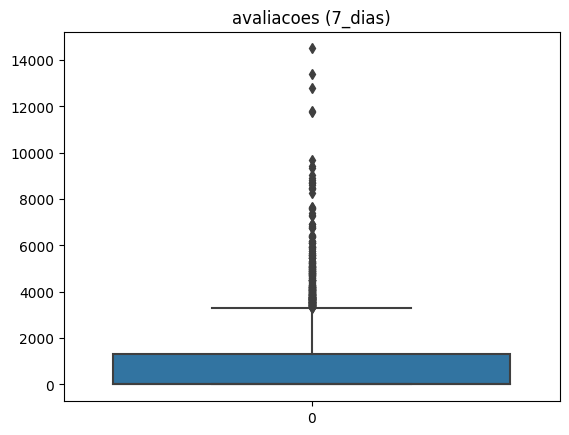

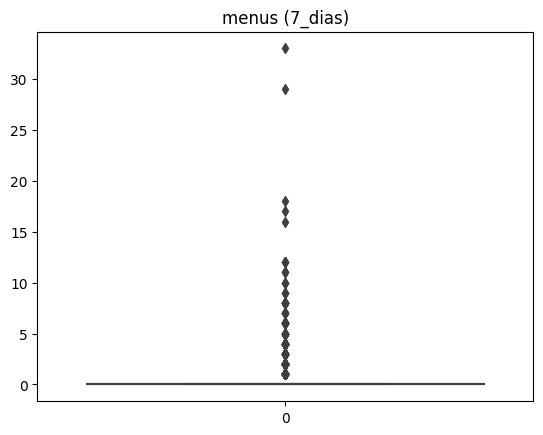

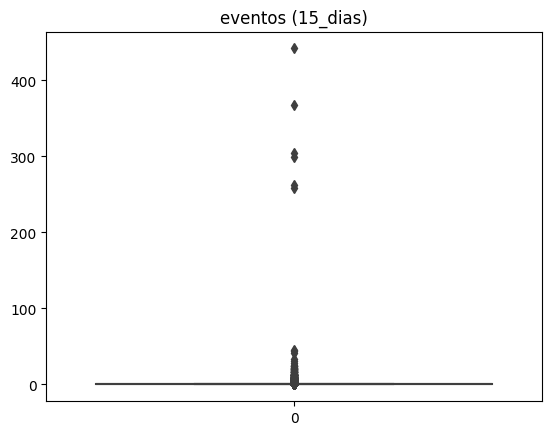

In [1284]:
for col in df.columns:
    if df[col].dtype == 'int32':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

As we can see from all the previous plots it is possibel to conclude that the following KPI's has the greatest variance:
* Tutores
* Relatorios Diarios
* Avaliacoes

__Relashionship Between Variabels__

<Axes: >

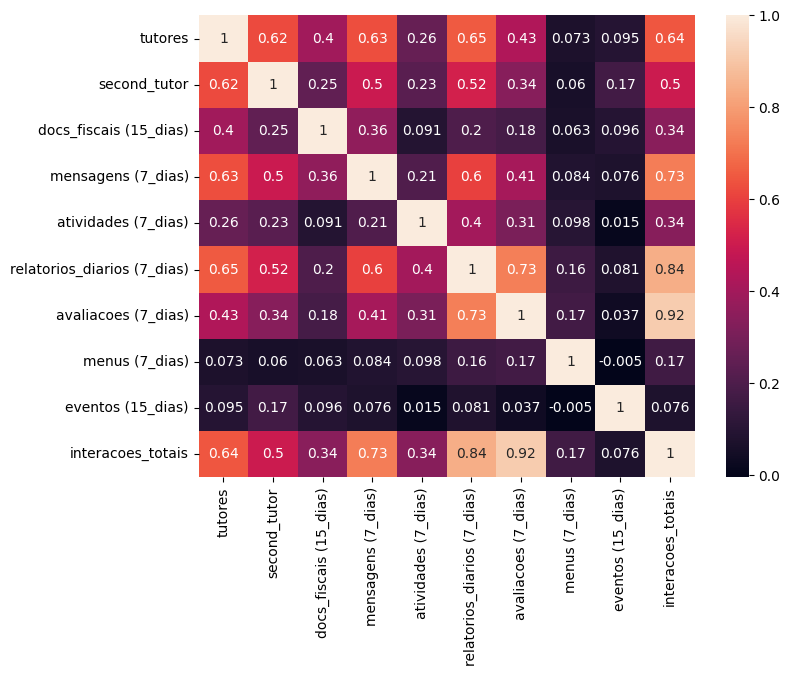

In [1285]:
corr = df.iloc[:,3:13].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

By the heatmpa it is possibel to understand:
* interacoes totais has a great correlation with avaliacoes (0.92), relatorios diarios (0.84), mensagens (0.73) and has a good interaction with tutores (0.64). The previous variables appears to have more meaning to this analyse
* relatorios diarios has a great correlation with avalaicoes!!!!!
* relatorios diarios has a good correlation with tutores and mensagens
* tutores has a good correlation with relatorios diarios, mensagens and second tutores
* mensagens has a good correlation with tutores and relatorios diarios

# Escola
* Let´s try to understand wich 'escola' has the lowest interaction with the plataform EDUCABIZ

In [1286]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


In [1287]:
print('There are {} schools'.format(df['escola'].nunique()))

There are 888 schools


__Total Interactions__

In [1288]:
# Let´s create a column called 'total_interacoes'. I t will be the sum of every numeric column
df['interacoes_totais'] = df.iloc[:,3:12].sum(axis=1)
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


In [1289]:
# Schools Witht the less number of 'interacoes_totais'
escola_int = df.groupby('escola').agg(interacoes=('interacoes_totais','sum')).sort_values(by='interacoes').reset_index()
escola_int

,escola,interacoes
0,O Mundo de Mia,0
1,Centro de Estudos Eureka,0
2,O Jardim da Isabel,0
3,O Gatinho,0
4,Crescer no Campo - Multi-Serviços Lda.,0
...,...,...
883,JARDIMCOOPE / SOLINORTE,56278
884,CSP do Senhor da Vera Cruz do Candal,58533
885,A Cidade dos Brinquedos,60806
886,Casa Vera Cruz,63557


In [1290]:
print('There are {} schools with 0 interactions which represent {}% of all the schools'.format(escola_int[escola_int['interacoes']==0]['escola'].nunique(),
                                                                                               round(escola_int[escola_int['interacoes']==0]['escola'].nunique() / escola_int['escola'].nunique() *100),0))

There are 130 schools with 0 interactions which represent 15% of all the schools


# EDUCABIZ Features Less Used

In [1291]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


In [1292]:
# Let´s create a dataframe with the sum of interactions by each column (KPI)
kpi_use = pd.DataFrame(df.iloc[:,3:12].sum()).reset_index().rename(columns={'index':'KPI',
                                                                   0:'interacoes'}).sort_values(by='interacoes')
kpi_use
    

,KPI,interacoes
7,menus (7_dias),1448
8,eventos (15_dias),4928
4,atividades (7_dias),15677
1,second_tutor,61511
2,docs_fiscais (15_dias),293401
0,tutores,430408
5,relatorios_diarios (7_dias),826343
3,mensagens (7_dias),2267651
6,avaliacoes (7_dias),3903645


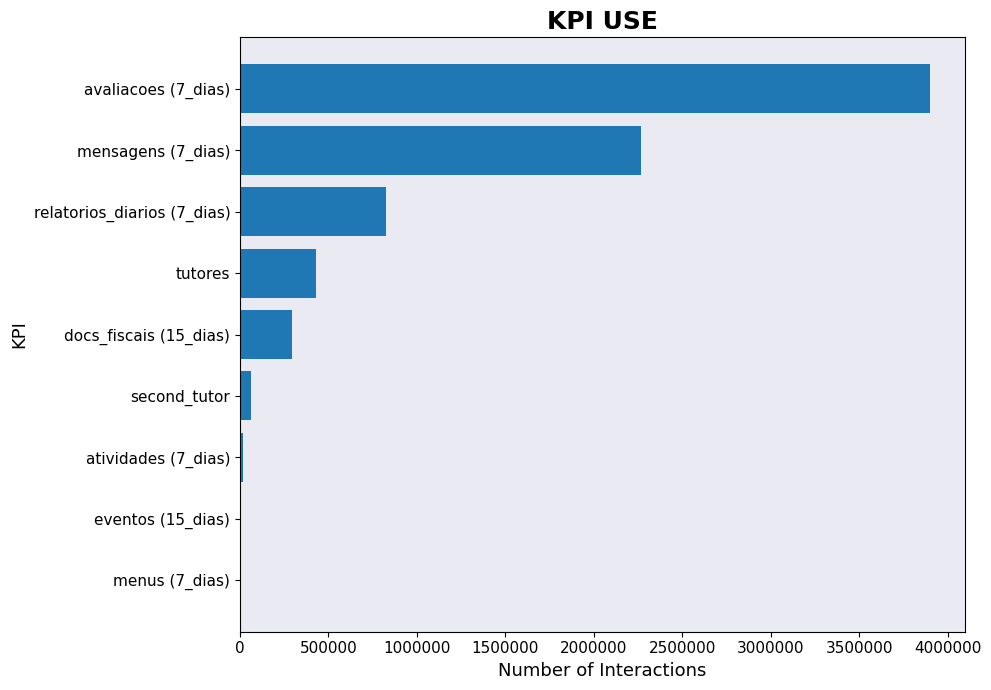

In [1293]:
plt.figure(figsize=(10,7))

plt.gca().set_facecolor('#EAEAF2')

plt.barh(kpi_use['KPI'],kpi_use['interacoes'])

plt.title('KPI USE', fontweight='bold', fontsize=18)

plt.xlabel('Number of Interactions', fontsize=13)
plt.xticks(fontsize=11)
plt.gca().ticklabel_format(axis='x', style='plain')

plt.ylabel('KPI',fontsize=13)
plt.yticks(fontsize=11)


    
plt.tight_layout()

plt.show()

As we can see from the previous plot the feature less used at the EDUCABIZ Plataform are the following ones:
1. menus
2. eventos
3. atividades

# Cluster Analyse
* Let´s Do A Cluster Analyse To classify each school based on their interactions

In [1294]:
df.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


## Data Preprocessing

In [1295]:
# Let's create a copy of the original dataset
df1 = df.copy()
df1.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237


### Dealing With Outliers

In [1296]:
df_outliers = df1.copy()
df_outliers

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77,46,38,353,0,340,2278,0,0,3132
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141,25,63,411,0,60,358,0,0,1058
4642,Ago,Zebra,https://zebra.educabiz.com,1,0,4,4,0,0,0,0,0,9
4643,Ago,Simplio,https://simplio.educabiz.com,0,0,54,196,0,0,0,0,0,250


In [1297]:
# Model building
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.01), max_features=1.0)
model.fit(df_outliers.iloc[:,3:])

IsolationForest(contamination=0.01, n_estimators=150)

In [1298]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(df_outliers.iloc[:,3:])
anomaly=model.predict(df_outliers.iloc[:,3:])

df_outliers['scores']=scores
df_outliers['anomaly']=anomaly

In [1299]:
anomaly = df_outliers.loc[df_outliers['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 47


In [1300]:
df_outliers[df_outliers['anomaly']==-1]

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,scores,anomaly
152,Jan,Casa Vera Cruz,https://cspveracruz.educabiz.com,393,198,291,1427,39,1271,0,0,6,3625,-0.018518,-1
228,Jan,Centro Social Padres Redentoristas,https://cspadresredentoristas.educabiz.com,621,77,349,1983,66,901,0,0,5,4002,-0.036940,-1
401,Jan,CSP do Senhor da Vera Cruz do Candal,https://cscandal.educabiz.com,490,65,7,1520,114,1929,0,0,0,4125,-0.037693,-1
902,Mar,CSP do Senhor da Vera Cruz do Candal,https://cscandal.educabiz.com,492,65,0,1035,130,2333,12803,0,0,16858,-0.084967,-1
919,Mar,Total Centro de Estudo,https://totalestudo.educabiz.com,285,116,426,856,0,624,1160,0,299,3766,-0.005520,-1
962,Mar,A Cidade dos Brinquedos,https://cidadedosbrinquedos.educabiz.com,378,30,561,2862,1,1084,7322,0,0,12238,-0.016026,-1
1123,Mar,SCMVV Infância,https://scmvvinfancia.educabiz.com,368,9,0,2027,52,1101,8452,0,0,12009,-0.019415,-1
1208,Mar,Centro Social Padres Redentoristas,https://cspadresredentoristas.educabiz.com,624,79,1060,1960,81,1092,9358,0,6,14260,-0.107592,-1
1292,Mar,Centro Apoio Social Mozelos,https://casm.educabiz.com,366,63,0,1466,41,1274,8482,0,8,11700,-0.030802,-1
1308,Mar,IPPI,https://ippi.educabiz.com,591,37,1182,3046,2,634,4757,4,0,10253,-0.049260,-1


Because our anomalies represent real data we aren´t going to drop this values

### Encoding Categorical Data
* The 'month' variabel could be important for this analyse as there are schools that can be closed for summer holidays. Therefore, let´s create dummy variabels representing each month, this alwos us to take into acount the work period of each school

In [1301]:
# One-Hot Encoding
df_p = pd.get_dummies(df1, columns=['month'])
df_p = df_p.replace({True: 1, False: 0})
df_p

,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,month_Abri,month_Ago,month_Jan,month_Jul,month_Mai,month_Mar
0,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,0,0,1,0,0,0
1,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,0,0,1,0,0,0
2,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,0,0,1,0,0,0
3,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,0,0,1,0,0,0
4,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Sonho Audaz,https://sonhoaudaz.educabiz.com,77,46,38,353,0,340,2278,0,0,3132,0,1,0,0,0,0
4641,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141,25,63,411,0,60,358,0,0,1058,0,1,0,0,0,0
4642,Zebra,https://zebra.educabiz.com,1,0,4,4,0,0,0,0,0,9,0,1,0,0,0,0
4643,Simplio,https://simplio.educabiz.com,0,0,54,196,0,0,0,0,0,250,0,1,0,0,0,0


### Feature Scalling

In [1302]:
sc = StandardScaler()
df2=sc.fit_transform(df_p.iloc[:,2:])
df2

array([[-0.47256269, -0.66591087, -0.25682411, ..., -0.45199985,
        -0.44055352, -0.43776333],
       [-1.00291792, -0.66591087,  0.24620604, ..., -0.45199985,
        -0.44055352, -0.43776333],
       [ 3.44557184,  4.56385652,  0.70931317, ..., -0.45199985,
        -0.44055352, -0.43776333],
       ...,
       [-0.99209434, -0.66591087, -0.47240846, ..., -0.45199985,
        -0.44055352, -0.43776333],
       [-1.00291792, -0.66591087, -0.07317818, ..., -0.45199985,
        -0.44055352, -0.43776333],
       [-0.29938547,  0.33981363, -0.21690108, ..., -0.45199985,
        -0.44055352, -0.43776333]])

### PCA

In [1303]:
# Applying PCA
pca = PCA(n_components=7)
pca_results = pca.fit_transform(df2)
print ('Cumulative variance explained: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained: 75.12%


In [1304]:
# Crete a dataframe with pca_results
pca_results = pd.DataFrame(pca_results,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.747269,0.722200,1.327940,1.442739,0.409528,0.125169,0.008230
1,-1.929899,0.642482,1.486075,1.207537,0.407601,0.118972,0.223567
2,4.417340,2.944873,1.014674,2.662480,1.192143,0.238841,0.425407
3,-0.885816,0.892556,1.563231,1.848831,0.333041,0.097791,-0.791517
4,-1.846437,0.660988,1.586081,1.109753,0.403120,0.121219,0.390138
...,...,...,...,...,...,...,...
4640,1.105993,-0.871816,-2.093612,1.232063,0.743624,-0.143137,0.513810
4641,-0.402540,-0.351036,-1.750725,0.904262,0.776820,-0.134544,0.967900
4642,-2.109039,-1.063517,-1.475228,0.696808,0.685329,-0.197096,0.454838
4643,-1.875146,-0.986520,-1.413723,0.575478,0.692996,-0.198231,0.620934


In [1305]:
# Variance Explained By Each PCA
explained_variance = pca.explained_variance_
explained_variance

array([4.5084126 , 1.4866102 , 1.30988688, 1.217568  , 1.20162189,
       1.19528225, 1.10201862])

In [1306]:
# Get a DataFrame With The Orignal Data and PCA's
df.reset_index(inplace=True)
df.drop(columns='index')
df.reset_index(inplace=True)

pca_results.reset_index(inplace=True)
pca_results

df_pca1 = pd.merge(df,pca_results, on='index', how='left')
df_pca1.drop(columns=['index'],inplace=True)
df_pca1.drop(columns=['level_0'],inplace=True)

<Axes: >

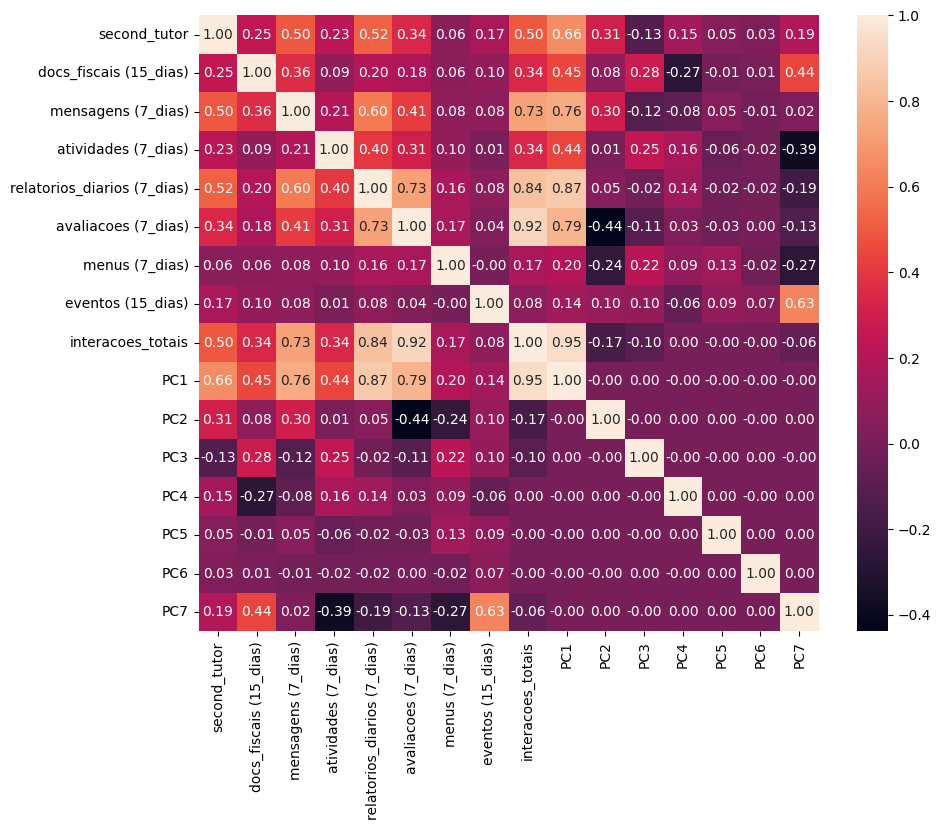

In [1307]:
# Pearson Correlation
corr = df_pca1.iloc[:,4:].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, fmt = '.2f')

### Determine The K (number of clusters)

In [1308]:
df2 = np.array(pca_results.iloc[:,3:])
df2

array([[ 1.3279399 ,  1.44273889,  0.40952809,  0.12516908,  0.00823011],
       [ 1.48607538,  1.20753679,  0.40760063,  0.11897196,  0.22356748],
       [ 1.01467352,  2.66247963,  1.19214308,  0.23884133,  0.42540677],
       ...,
       [-1.47522809,  0.69680807,  0.68532925, -0.19709572,  0.45483768],
       [-1.41372333,  0.57547839,  0.69299575, -0.19823117,  0.62093412],
       [-1.61429539,  0.82228946,  0.75005802, -0.1541609 ,  0.82834381]])

__Elbow Method__

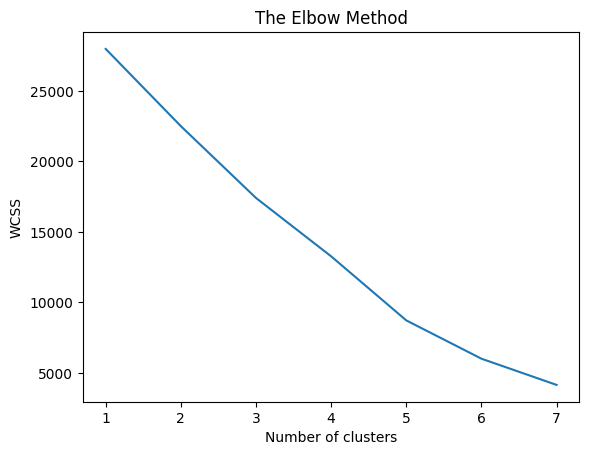

In [1309]:
# Elbow Method
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=7,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Dendogram__

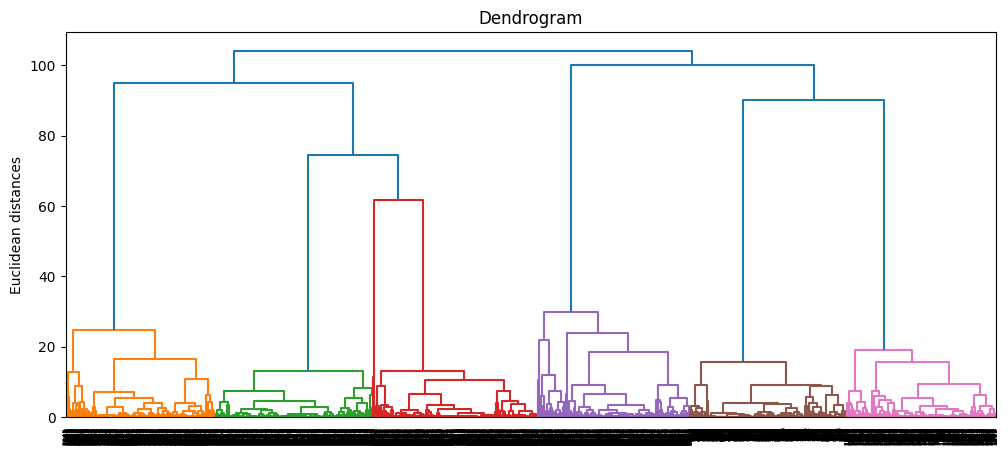

In [1310]:
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df2, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

As we can see by the dendogram and by the Elbow Method There are 6 different clusters

### K-Means Clustering

In [1311]:
# Training the K-Means Model
np.random.seed(42)
df_kmeans = df2.copy()
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_kmeans)
y_kmeans

array([2, 2, 2, ..., 4, 4, 4])

In [1312]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_kmeans = df.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
4    832
2    792
1    776
0    750
3    748
5    747
Name: count, dtype: int64

In [1313]:
df_kmeans['Cluster'] = df_kmeans['Cluster'].astype('str')
df_kmeans.drop(columns=['level_0','index'],inplace=True)

In [1314]:
df_kmeans.iloc[:,3:14].groupby('Cluster').agg(n_escolas=('Cluster','count'),
                                              tutores=('tutores','mean'),
                                              second_tutor=('second_tutor','mean'),
                                              docs_fiscais=('docs_fiscais (15_dias)','mean'),
                                              mensagens=('mensagens (7_dias)','mean'),
                                              atividades=('atividades (7_dias)','mean'),
                                              relatorios_diarios=('relatorios_diarios (7_dias)','mean'),
                                              avaliacoes=('avaliacoes (7_dias)','mean'),
                                              menus=('menus (7_dias)','mean'),
                                              eventos=('eventos (15_dias)','mean'),
                                              interacoes_totais=('interacoes_totais','mean'),
                                              interacoes_totais_max=('interacoes_totais','max'),
                                              interacoes_totais_min=('interacoes_totais','min')).sort_values(by='interacoes_totais',ascending=False)

,n_escolas,tutores,second_tutor,docs_fiscais,mensagens,atividades,relatorios_diarios,avaliacoes,menus,eventos,interacoes_totais,interacoes_totais_max,interacoes_totais_min
Cluster,,,,,,,,,,,,,
3,748,95.058824,13.751337,107.867647,596.961230,4.835561,218.280749,1307.903743,0.481283,1.985294,2347.125668,12482,0
0,750,96.721333,13.938667,97.973333,569.384000,4.362667,201.701333,1337.448000,0.442667,2.137333,2324.109333,16355,0
5,747,97.104418,13.539491,88.467202,438.269076,4.277108,202.880857,1341.775100,0.356091,1.305221,2187.974565,14260,0
4,832,85.943510,13.794471,19.775240,351.953125,0.247596,118.447115,988.242788,0.219952,0.555288,1579.179087,17617,0
1,776,89.952320,12.016753,27.171392,616.654639,1.618557,156.212629,25.840206,0.000000,0.002577,929.469072,16664,0
2,792,92.068182,12.443182,44.965909,372.916667,5.215909,177.363636,98.069444,0.387626,0.506313,803.936869,20400,0


### Hierarchical Clustering

In [1315]:
# Training the Model
np.random.seed(42)
df_AgglomerativeC = df2.copy()
AgglomerativeC = AgglomerativeClustering(n_clusters=6,affinity = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

In [1316]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_AgglomerativeC = df.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

Cluster
0    824
5    787
4    781
2    760
1    749
3    744
Name: count, dtype: int64

In [1317]:
#df_AgglomerativeC['Cluster'] = df_AgglomerativeC['Cluster'].astype('str')
df_AgglomerativeC.drop(columns=['level_0','index'],inplace=True)

In [1318]:
df_AgglomerativeC

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,Cluster
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,4
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,4
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,4
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,4
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77,46,38,353,0,340,2278,0,0,3132,0
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141,25,63,411,0,60,358,0,0,1058,0
4642,Ago,Zebra,https://zebra.educabiz.com,1,0,4,4,0,0,0,0,0,9,0
4643,Ago,Simplio,https://simplio.educabiz.com,0,0,54,196,0,0,0,0,0,250,0


In [1319]:
df_AgglomerativeC.iloc[:,3:14].groupby('Cluster').agg(n_escolas=('Cluster','count'),
                                              tutores=('tutores','mean'),
                                              second_tutor=('second_tutor','mean'),
                                              docs_fiscais=('docs_fiscais (15_dias)','mean'),
                                              mensagens=('mensagens (7_dias)','mean'),
                                              atividades=('atividades (7_dias)','mean'),
                                              relatorios_diarios=('relatorios_diarios (7_dias)','mean'),
                                              avaliacoes=('avaliacoes (7_dias)','mean'),
                                              menus=('menus (7_dias)','mean'),
                                              eventos=('eventos (15_dias)','mean'),
                                              interacoes_totais=('interacoes_totais','mean'),
                                              interacoes_totais_max=('interacoes_totais','max'),
                                              interacoes_totais_min=('interacoes_totais','min')).sort_values(by='interacoes_totais',ascending=False)

,n_escolas,tutores,second_tutor,docs_fiscais,mensagens,atividades,relatorios_diarios,avaliacoes,menus,eventos,interacoes_totais,interacoes_totais_max,interacoes_totais_min
Cluster,,,,,,,,,,,,,
2,760,100.602632,14.222368,113.938158,621.813158,5.939474,232.255263,1385.896053,0.555263,1.113158,2476.335526,20400,0
1,749,96.309746,13.807744,92.962617,567.993324,4.630174,205.073431,1371.197597,0.443258,1.189586,2353.607477,16664,0
3,744,95.146505,13.342742,85.142473,436.544355,4.294355,202.860215,1345.626344,0.357527,0.908602,2184.223118,14260,0
0,824,81.668689,12.496359,19.656553,314.540049,0.192961,112.990291,997.804612,0.234223,2.586165,1542.169903,17617,0
5,787,94.673443,13.698856,29.799238,644.013977,1.517154,159.500635,0.000000,0.000000,0.000000,943.203304,10083,0
4,781,88.632522,11.978233,43.769526,357.025608,4.029449,162.189501,0.000000,0.300896,0.491677,668.417414,4125,0


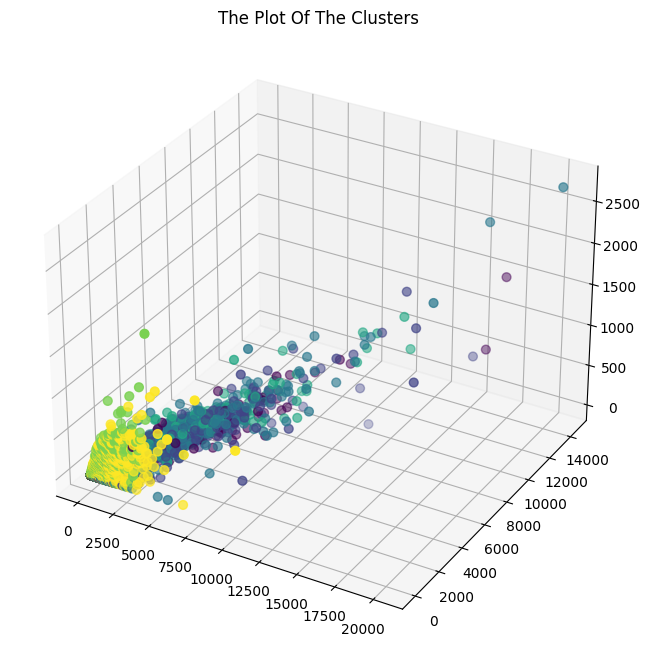

In [1320]:
#Plotting the clusters
x = df_AgglomerativeC["interacoes_totais"]
y = df_AgglomerativeC["avaliacoes (7_dias)"]
z = df_AgglomerativeC["relatorios_diarios (7_dias)"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_AgglomerativeC["Cluster"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

Compared some both clusters results, the clusters from the Hierachical Clustering have more diferences. Therefore Let´s choose work with those clusters.

### Evaluation Model

<Axes: xlabel='Cluster', ylabel='count'>

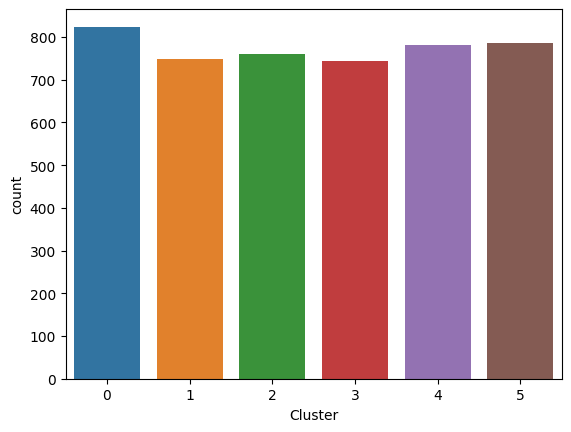

In [1321]:
sns.countplot(x=df_AgglomerativeC['Cluster'])

The Clusters appear to be fairly distributed

<Axes: xlabel='Cluster', ylabel='interacoes_totais'>

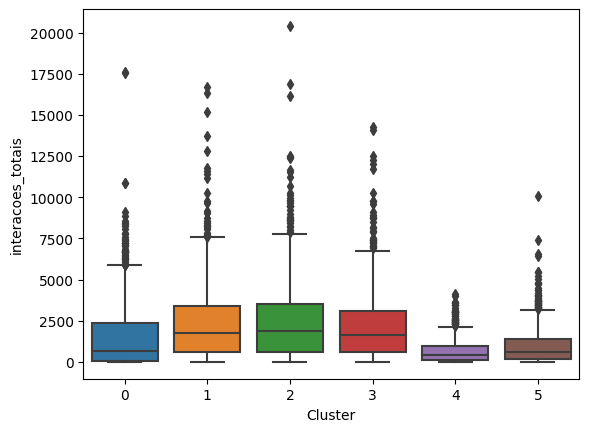

In [1322]:
sns.boxplot(data=df_AgglomerativeC, y='interacoes_totais', x='Cluster')

__Hipotesis Test__

* Let´s apply One-Way Anova In Order to Understand If There Are Signifanct Diferences Between Each Cluster
* HA: There Is Significant Diferences vs H1: There is No Difference Significant

In [1323]:
df_AgglomerativeC.iloc[:,3:14].groupby('Cluster').agg(n_escolas=('Cluster','count'),
                                              tutores=('tutores','mean'),
                                              second_tutor=('second_tutor','mean'),
                                              docs_fiscais=('docs_fiscais (15_dias)','mean'),
                                              mensagens=('mensagens (7_dias)','mean'),
                                              atividades=('atividades (7_dias)','mean'),
                                              relatorios_diarios=('relatorios_diarios (7_dias)','mean'),
                                              avaliacoes=('avaliacoes (7_dias)','mean'),
                                              menus=('menus (7_dias)','mean'),
                                              eventos=('eventos (15_dias)','mean'),
                                              interacoes_totais=('interacoes_totais','mean'),
                                              interacoes_totais_max=('interacoes_totais','max'),
                                              interacoes_totais_min=('interacoes_totais','min')).sort_values(by='interacoes_totais',ascending=False)

,n_escolas,tutores,second_tutor,docs_fiscais,mensagens,atividades,relatorios_diarios,avaliacoes,menus,eventos,interacoes_totais,interacoes_totais_max,interacoes_totais_min
Cluster,,,,,,,,,,,,,
2,760,100.602632,14.222368,113.938158,621.813158,5.939474,232.255263,1385.896053,0.555263,1.113158,2476.335526,20400,0
1,749,96.309746,13.807744,92.962617,567.993324,4.630174,205.073431,1371.197597,0.443258,1.189586,2353.607477,16664,0
3,744,95.146505,13.342742,85.142473,436.544355,4.294355,202.860215,1345.626344,0.357527,0.908602,2184.223118,14260,0
0,824,81.668689,12.496359,19.656553,314.540049,0.192961,112.990291,997.804612,0.234223,2.586165,1542.169903,17617,0
5,787,94.673443,13.698856,29.799238,644.013977,1.517154,159.500635,0.000000,0.000000,0.000000,943.203304,10083,0
4,781,88.632522,11.978233,43.769526,357.025608,4.029449,162.189501,0.000000,0.300896,0.491677,668.417414,4125,0


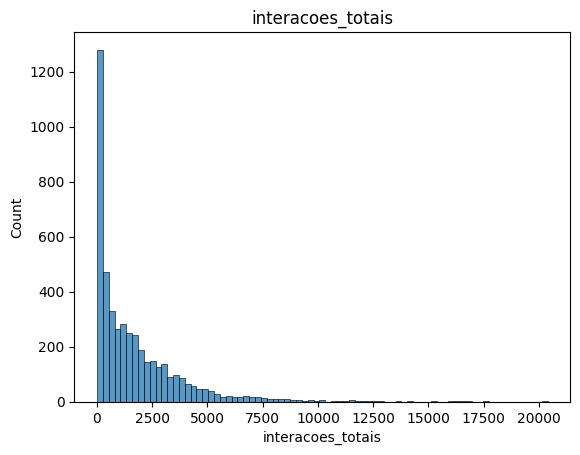

In [1324]:
# Check distribution
sns.histplot(df_AgglomerativeC['interacoes_totais'])
plt.title('interacoes_totais')
plt.show()

In [1325]:
df_AgglomerativeC.isna().sum()

month                          0
escola                         0
slug                           0
tutores                        0
second_tutor                   0
docs_fiscais (15_dias)         0
mensagens (7_dias)             0
atividades (7_dias)            0
relatorios_diarios (7_dias)    0
avaliacoes (7_dias)            0
menus (7_dias)                 0
eventos (15_dias)              0
interacoes_totais              0
Cluster                        0
dtype: int64

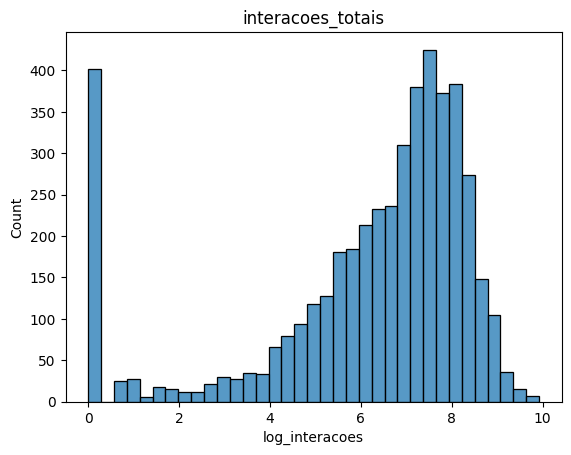

In [1326]:
#Aplly log in order to get data with a normal distribution
df_AgglomerativeC['log_interacoes'] = np.log(df_AgglomerativeC['interacoes_totais'] + 1)
sns.histplot(df_AgglomerativeC['log_interacoes'])
plt.title('interacoes_totais')
plt.show()

In [1327]:
# Get The Data
cluster_0 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 0]['log_interacoes']
cluster_1 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 1]['log_interacoes']
cluster_2 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 2]['log_interacoes']
cluster_3 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 3]['log_interacoes']
cluster_4 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 4]['log_interacoes']
cluster_5 = df_AgglomerativeC[df_AgglomerativeC['Cluster'] == 5]['log_interacoes']

# Perform one-way ANOVA on log-transformed data
f_statistic, p_value = stats.f_oneway(cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5)
# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is significant (e.g., less than a chosen alpha level)
alpha = 0.05  # Adjust the alpha level as needed
if p_value < alpha:
    print("Reject the null hypothesis (there are significant differences between groups).")
else:
    print("Fail to reject the null hypothesis (there are no significant differences between groups).")

F-statistic: 71.28277249559247
P-value: 4.3987199384589675e-72
Reject the null hypothesis (there are significant differences between groups).


# Plots

## Page 1

__Low Interaction VS High Interaction - Pie Chart__

In [1328]:
nivel_interacao_pie_chart = px.pie(df_kmeans,
                                   names='nivel_interacao',
                                   color='nivel_interacao',
                                   color_discrete_map={'Baixo':'royalblue',
                                                       'Elevado':'lightgrey'},
                                   labels={'nivel_interacao': 'Nivel Interação',
                                           'value' : 'Número de Escolas'}
                                   )


nivel_interacao_pie_chart.update_traces(hoverinfo='value', textinfo='percent',
                                       textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))

nivel_interacao_pie_chart.update_layout(width=600,
                                        height=450,
                                        title={
                                            'text': '<b>Número de Escolas Por Nível de Interação<b>',
                                            'font': {'size': 22}
                                            },
                                        template='simple_white',
                                        legend=dict(
                                            title=dict(text="Nível de Interação", font=dict(size=18)),  # Adjust title size
                                            title_font=dict(size=18))
                                        )

nivel_interacao_pie_chart.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['month', 'escola', 'slug', 'tutores', 'second_tutor', 'docs_fiscais (15_dias)', 'mensagens (7_dias)', 'atividades (7_dias)', 'relatorios_diarios (7_dias)', 'avaliacoes (7_dias)', 'menus (7_dias)', 'eventos (15_dias)', 'interacoes_totais', 'Cluster'] but received: nivel_interacao

__Indicador - Número de Escolas__

* NOTE: This Indicator Will Chnage Based On the 'nivel de intereacao' choosed on the filter

In [ ]:
df_kmeans

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,nivel_interacao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,Baixo
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,Baixo
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,Elevado
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,Baixo
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77,46,38,353,0,340,2278,0,0,3132,Elevado
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141,25,63,411,0,60,358,0,0,1058,Baixo
4642,Ago,Zebra,https://zebra.educabiz.com,1,0,4,4,0,0,0,0,0,9,Baixo
4643,Ago,Simplio,https://simplio.educabiz.com,0,0,54,196,0,0,0,0,0,250,Baixo


In [ ]:
df_indicador = df_kmeans.groupby('nivel_interacao')['escola'].count().reset_index()
df_indicador

,nivel_interacao,escola
0,Baixo,3598
1,Elevado,1047


In [ ]:
df_indicador['escola'].iloc[0]

3598

In [ ]:
indicador_numero_escolas = go.Figure(go.Indicator(mode='number',
                                                  title = {'text': f"<span>Nível de Interação {df_indicador['nivel_interacao'].iloc[0]} e Número de Escolas"},
                                                  value= df_indicador['escola'].iloc[0],
                                                  number={'valueformat': '.0f'}
                                                  ))

indicador_numero_escolas.update_layout(width=500,
                                       height=290)

indicador_numero_escolas.show()

__KPI Use - Bar Plot__

* NOTE: This Plot Will change Based On the 'nivel de intereacao' choosed on the filter

In [ ]:
df_kpi_use = df_kmeans.groupby('nivel_interacao').agg(tutores=('tutores','sum'),
                                                      second_tutor=('second_tutor','sum'),
                                                      docs_fiscais=('docs_fiscais (15_dias)','sum'),
                                                      mensagens=('mensagens (7_dias)','sum'),
                                                      atividades=('atividades (7_dias)','sum'),
                                                      relatorios_diarios=('relatorios_diarios (7_dias)','sum'),
                                                      avaliacoes=('avaliacoes (7_dias)','sum'),
                                                      menus=('menus (7_dias)','sum'),
                                                      eventos=('eventos (15_dias)','sum')).reset_index()

df_kpi_use = pd.melt(df_kpi_use, id_vars=['nivel_interacao'], value_vars=df_kpi_use.iloc[:,1:])

df_kpi_use.rename(columns={'variable':'kpi',
                           'value':'numero_interacoes'}, inplace=True)

df_kpi_use.sort_values(by='numero_interacoes',
                       ascending=False,
                       inplace=True)

df_kpi_use

,nivel_interacao,kpi,numero_interacoes
13,Elevado,avaliacoes,2564259
12,Baixo,avaliacoes,1339386
7,Elevado,mensagens,1318387
6,Baixo,mensagens,949264
11,Elevado,relatorios_diarios,466506
10,Baixo,relatorios_diarios,359837
0,Baixo,tutores,226172
1,Elevado,tutores,204236
4,Baixo,docs_fiscais,149971
5,Elevado,docs_fiscais,143430


In [ ]:
fig = px.bar(
    df_kpi_use,
    x='kpi',
    y='numero_interacoes',
    color='nivel_interacao',
    color_discrete_map={'Baixo':'royalblue',
                        'Elevado':'lightgrey'},
    labels={'numero_interacoes': 'Number de Interações', 'kpi': 'KPI'},
    template='simple_white',  
)


fig.update_layout(
    
    width=900,
    height=550,
    title={'text': '<b>Utilização de KPIs<b>',
           'font': {'size': 22}},
    xaxis_title=None,
    legend_title='Nivel de Interação'
)

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.update_yaxes(title_text='Numero de Interações',title_font=dict(size=16),
                 tickfont=dict(size=15))
fig.update_xaxes(tickfont=dict(size=15))

fig.show()

__Tabel To Display The Schools From the Lowest Number of 'total_interacoes' to the highest value__

* NOTE: This Plot Will Be Updated Based On the 'nivel de interacao' choosed on the filter

In [ ]:
df_kmeans.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,nivel_interacao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,Baixo
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,Baixo
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,Elevado
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,Baixo
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,Baixo


In [ ]:
df_table = df_kmeans[['escola','nivel_interacao','interacoes_totais','tutores','second_tutor','docs_fiscais (15_dias)','mensagens (7_dias)','atividades (7_dias)','relatorios_diarios (7_dias)','avaliacoes (7_dias)','menus (7_dias)','eventos (15_dias)']]
df_table.rename(columns={'escola':'Escola',
                         'nivel_interacao':'Nível de Interação',
                         'interacoes_totais':'Interações Totais',
                         'tutores':'Tutores',
                         'second_tutor':'Second Tutores',
                         'docs_fiscais (15_dias)':'Docs. Fiscais',
                         'mensagens (7_dias)':'Mensagens',
                         'atividades (7_dias)':'Atividades',
                         'relatorios_diarios (7_dias)':'Relatórios Diários',
                         'avaliacoes (7_dias)':'Avaliações',
                         'menus (7_dias)':'Menus',
                         'eventos (15_dias)':'Eventos'}, inplace=True)

df_table.sort_values(by='Interações Totais', ascending=True,inplace=True)

df_table

,Escola,Nível de Interação,Interações Totais,Tutores,Second Tutores,Docs. Fiscais,Mensagens,Atividades,Relatórios Diários,Avaliações,Menus,Eventos
3373,Aqui Há Ama,Baixo,0,0,0,0,0,0,0,0,0,0
2298,Centro de Estudos Professora Joca,Baixo,0,0,0,0,0,0,0,0,0,0
3884,Santa Casa da Misericórdia de Lousada,Baixo,0,0,0,0,0,0,0,0,0,0
318,Colégio Semear,Baixo,0,0,0,0,0,0,0,0,0,0
3885,Crescer a Sério,Baixo,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,Colégio Crescer no Campo,Elevado,16664,203,5,0,3826,5,816,11807,0,2
902,CSP do Senhor da Vera Cruz do Candal,Elevado,16858,492,65,0,1035,130,2333,12803,0,0
4323,Centro Social Padres Redentoristas,Elevado,17538,487,88,166,4065,3,950,11777,0,2
4075,A Cidade dos Brinquedos,Elevado,17617,393,31,51,2084,0,1636,13422,0,0


In [ ]:

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_table.columns),
                fill_color='paleturquoise',
                align='center',
                font=dict(size=12)),
    cells=dict(values=[df_table['Escola'],df_table['Nível de Interação'],df_table['Interações Totais'],df_table['Tutores'], df_table['Second Tutores'],df_table['Docs. Fiscais'], df_table['Mensagens'], df_table['Atividades'], df_table['Relatórios Diários'], df_table['Avaliações'], df_table['Menus'],df_table['Eventos'] ],
               fill_color='lavender',
               align='center',
               font=dict(size=12)))
])

fig.update_layout(width=1100,
                  height=550)

fig.show()

__KPI Use Over the Months__

* NOTE: This Plot Will Be Updated Based On the 'nivel de interacao' choosed on the filter and also this will have a filter to select the KPI values to be displayed

In [ ]:
df_kmeans.head()

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,nivel_interacao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,Baixo
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,Baixo
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,Elevado
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,Baixo
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,Baixo


In [ ]:
df_line_plot = df_kmeans.groupby('month')['interacoes_totais'].sum().reset_index()
custom_order = ["Jan", "Mar", "Abri","Mai","Jul","Ago"]
df_line_plot['month'] = pd.Categorical(df_line_plot['month'], categories=custom_order, ordered=True)
df_line_plot = df_line_plot.sort_values(by='month')
df_line_plot

,month,interacoes_totais
2,Jan,525084
5,Mar,1648598
0,Abri,1787043
4,Mai,1846520
3,Jul,737529
1,Ago,1260238


In [ ]:
by_month = go.Figure(go.Scatter(
    x=df_line_plot['month'], 
    y=df_line_plot['interacoes_totais'], 
    mode='lines',
    line=dict(color='royalblue'),
    fill='tonexty',
    hovertext=[f'Month: {month}<br>Interaçôes: {interacoes_totais}' for month, interacoes_totais in zip(df_line_plot['month'], df_line_plot['interacoes_totais'])]
))

by_month.update_yaxes(title_text='Número de Interações Por Mês',title_font={'size': 18}, tickfont=dict(size=16))
by_month.update_xaxes(tickfont=dict(size=16))

by_month.update_traces(marker=dict(line=dict(color='#000000', width=2)))

by_month.update_layout(width=1500,
                       height=400,
                       title={'text': '<b>Número de Interações Por Mês<b>',
                              'font': {'size': 22}},
                       template='simple_white')

by_month.show()

In [ ]:
df_kmeans

,month,escola,slug,tutores,second_tutor,docs_fiscais (15_dias),mensagens (7_dias),atividades (7_dias),relatorios_diarios (7_dias),avaliacoes (7_dias),menus (7_dias),eventos (15_dias),interacoes_totais,nivel_interacao
0,Jan,100 + Centro de Estudos de Murça,https://centrodeestudosdemurca.educabiz.com,49,0,31,14,0,78,0,0,0,172,Baixo
1,Jan,8Tempos-Associação Cultural,https://8tempos.educabiz.com,0,0,94,108,0,0,0,0,0,202,Baixo
2,Jan,ABLA,https://abla.educabiz.com,411,104,152,1988,3,490,0,5,0,3153,Elevado
3,Jan,Abrigo Infantil das Laranjeiras - SCMSJM,https://abrigoinfantildaslaranjeiras.educabiz.com,87,0,0,217,18,193,0,0,0,515,Baixo
4,Jan,Academia CIPE,https://eborlandia.educabiz.com,0,0,144,93,0,0,0,0,0,237,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Ago,Sonho Audaz,https://sonhoaudaz.educabiz.com,77,46,38,353,0,340,2278,0,0,3132,Elevado
4641,Ago,Colégio Mundo do Colibri,https://mundo-colibri.educabiz.com,141,25,63,411,0,60,358,0,0,1058,Baixo
4642,Ago,Zebra,https://zebra.educabiz.com,1,0,4,4,0,0,0,0,0,9,Baixo
4643,Ago,Simplio,https://simplio.educabiz.com,0,0,54,196,0,0,0,0,0,250,Baixo


## Page 2

__Indicator To Display the 'Nivel de Interação'__

* NOTE: This plot will be updated based on the 'escola' selected
* This will be created only in dash using a div!!!!

__KPIs Use By Scholl__
* NOTE: This plot will be updated based on the 'escola' selected
* This will be a plot similar to the previous bar plot 'KPIs Use'

In [ ]:
df_kpi_use_page2 = df_kmeans.groupby('escola').agg(tutores=('tutores','sum'),
                                                      second_tutor=('second_tutor','sum'),
                                                      docs_fiscais=('docs_fiscais (15_dias)','sum'),
                                                      mensagens=('mensagens (7_dias)','sum'),
                                                      atividades=('atividades (7_dias)','sum'),
                                                      relatorios_diarios=('relatorios_diarios (7_dias)','sum'),
                                                      avaliacoes=('avaliacoes (7_dias)','sum'),
                                                      menus=('menus (7_dias)','sum'),
                                                      eventos=('eventos (15_dias)','sum')).reset_index()

df_kpi_use_page2 = pd.melt(df_kpi_use_page2, id_vars=['escola'], value_vars=df_kpi_use_page2.iloc[:,1:])

df_kpi_use_page2.rename(columns={'variable':'kpi',
                           'value':'numero_interacoes'}, inplace=True)

df_kpi_use_page2.sort_values(by='numero_interacoes',
                       ascending=False,
                       inplace=True)

df_kpi_use_page2

,escola,kpi,numero_interacoes
5523,CSP do Senhor da Vera Cruz do Candal,avaliacoes,36979
5600,Centro Social Padres Redentoristas,avaliacoes,36860
5335,A Cidade dos Brinquedos,avaliacoes,35988
5934,JARDIMCOOPE / SOLINORTE,avaliacoes,33207
5539,Casa Vera Cruz,avaliacoes,33052
...,...,...,...
2513,Os Vivaços - Montenegro,docs_fiscais,0
5652,Centro de Estimulação Precoce,avaliacoes,0
5653,Centro de Estudos - Anjos do Saber,avaliacoes,0
5654,Centro de Estudos Eureka,avaliacoes,0


__Interactions Over the Months__

* NOTE: This plot will be updated based on the 'escola' selected
* This will be a plot similar to the previous line plot

##